# A Simple Neural Network from Scratch in Python

## Linearly Separable Data Sets


### Perceptron for the AND Function

[]

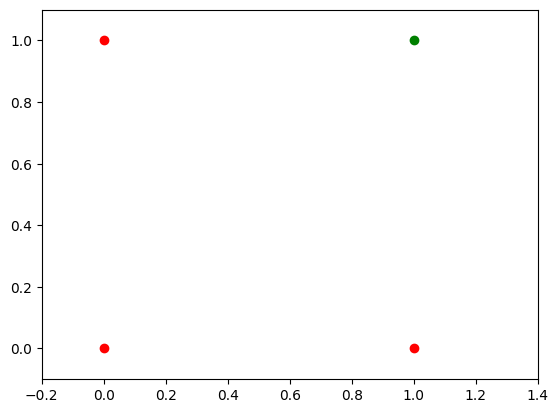

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color='r')
ax.scatter(0, 1, color='r')
ax.scatter(1, 0, color='r')
ax.scatter(1, 1, color='g')

ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

m = -1

plt.plot()

[]

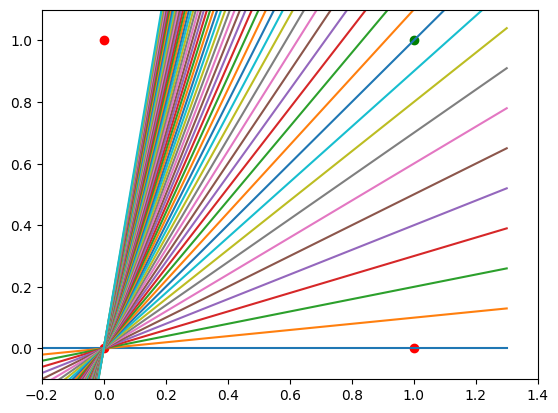

In [2]:
fig, ax = plt.subplots()

xmin, xmax = -0.2, 1.4

X = np.arange(xmin, xmax, 0.1)

ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

m = -1

for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X)

ax.scatter(0, 0, color='r')
ax.scatter(0, 1, color='r')
ax.scatter(1, 0, color='r')
ax.scatter(1, 1, color='g')

plt.plot()

[]

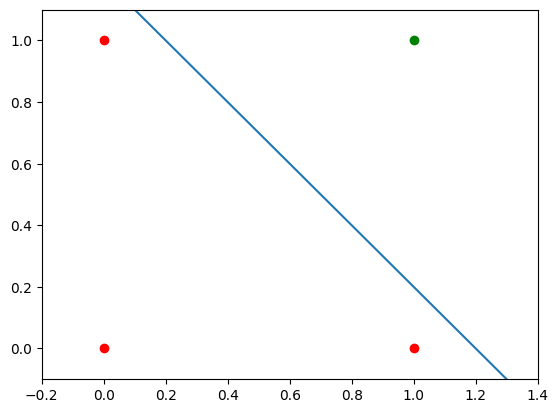

In [3]:
fig, ax = plt.subplots()

xmin, xmax = -0.2, 1.4

X = np.arange(xmin, xmax, 0.1)

ax.scatter(0, 0, color='r')
ax.scatter(0, 1, color='r')
ax.scatter(1, 0, color='r')
ax.scatter(1, 1, color='g')

ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

m, c = -1, 1.2


ax.plot(X, m * X + c)

plt.plot()

### Single Perceptron with a Bias

In [8]:
from collections import Counter

class Perceptron:
    def __init__(self, weights, bias=1, learning_rate=0.3):
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate


    @staticmethod
    def unit_step_function(x):
        if x <= 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        in_data = np.concatenate((in_data, [self.bias]))
        results = self.weights @ in_data

        return Perceptron.unit_step_function(results)
    
    def adjust(self, target_result, in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)

        calculated_result = self(in_data)
        error = target_result - calculated_result

        if error != 0:
            in_data = np.concatenate((in_data, [self.bias]))
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        evaluation = Counter()

        for sample, label in zip(data, labels):
            result = self(sample)

            if result == label:
                evaluation['correct'] += 1
            else:
                evaluation['wrong'] += 1

        return evaluation


In [9]:
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2, ))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)

p = Perceptron(weights = [0.3, 0.3, 0.3], learning_rate=0.2)

for in_data, label in labelled_samples(30):
    p.adjust(label, in_data)

test_data, test_labels = list(zip(*labelled_samples(30)))

evaluation = p.evaluate(test_data, test_labels)

print(evaluation)

Counter({'correct': 30})


-0.33333333333333326 1.0000000000000002


[]

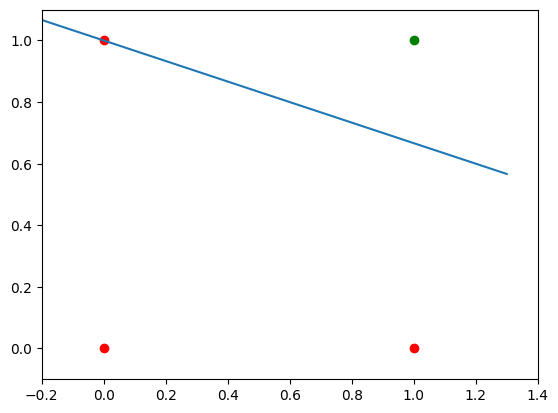

In [10]:
fig, ax = plt.subplots()

xmin, xmax = -0.2, 1.4

X = np.arange(xmin, xmax, 0.1)

ax.scatter(0, 0, color='r')
ax.scatter(0, 1, color='r')
ax.scatter(1, 0, color='r')
ax.scatter(1, 1, color='g')

ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]

print(m, c)

ax.plot(X, m * X + c)

plt.plot()

In [12]:
from sklearn.datasets import make_blobs

n_samples = 1000

samples, labels = make_blobs(n_samples=n_samples, centers=([2.5, 3], [6.7, 7.9]),
                             cluster_std=1.4, random_state=0)

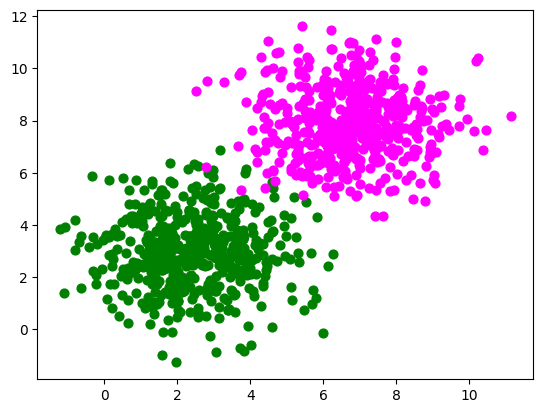

In [13]:
colors = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')

fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0],
               samples[labels==n_class][:, 1],
               c=colors[n_class], s=40, label=str(n_class))

In [15]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(samples, labels,
                                                                    train_size=0.8,
                                                                    test_size=0.2,
                                                                    random_state=1)

In [16]:
p = Perceptron(weights=[0.3, 0.3, 0.3], learning_rate=0.8)

for sample, label in zip(train_data, train_labels):
    p.adjust(label, sample)

evaluation = p.evaluate(train_data, train_labels)
print(evaluation)

Counter({'correct': 784, 'wrong': 16})


In [17]:
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 194, 'wrong': 6})


-1.4277135509226737 10.516023065099064


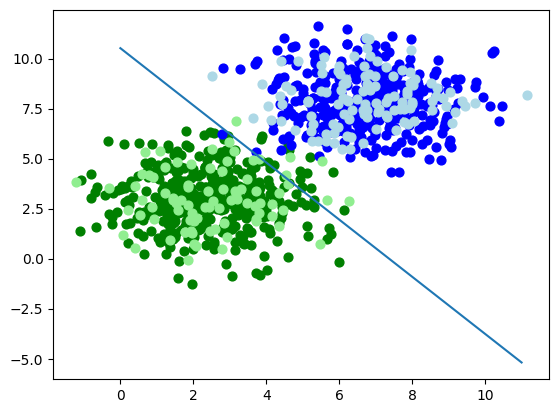

In [19]:
fig, ax = plt.subplots()

colors = ('green', 'blue')

for n_class in range(2):
    ax.scatter(train_data[train_labels==n_class][:, 0],
               train_data[train_labels==n_class][:, 1],
               c=colors[n_class], s=40, label=str(n_class))
    
colors = ('lightgreen', 'lightblue')

for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0],
               test_data[test_labels==n_class][:, 1],
               c=colors[n_class], s=40, label=str(n_class))
    

X = np.arange(np.max(samples[:, 0]))

m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]

print(m, c)

ax.plot(X, m * X + c)

plt.plot()
plt.show()